In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import backend as K
import matplotlib.pyplot as plt

In [17]:
from keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images to the range of [0., 1.]
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Reshape the data to 4D tensors
X_train = np.reshape(X_train, newshape=(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = np.reshape(X_test, newshape=(X_test.shape[0], X_train.shape[1], X_train.shape[2], 1))

In [18]:
latent_dim = 5
encoder = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, 3, strides=2, activation="relu", padding="same"),
        layers.Conv2D(64, 3, strides=2, activation="relu", padding="same"),
        layers.Flatten(),
        layers.Dense(16, activation="relu"),
        layers.Dense(latent_dim, name="latent_vector"),
    ],
    name="encoder",
)

In [19]:
decoder = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        layers.Dense(7 * 7 * 32, activation="relu"),
        layers.Reshape((7, 7, 32)),
        layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same"),
        layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same"),
        layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same"),
    ],
    name="decoder",
)

In [20]:
ae = keras.Sequential([encoder, decoder], name="ae")

ae.compile(
    loss="binary_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history = ae.fit(
    X_train, X_train, 
    epochs=1, 
    validation_data=(X_test, X_test)
)

2023-01-07 20:56:28.457188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1873/1875 [============================>.] - ETA: 0s - loss: 0.1856 - accuracy: 0.7990

2023-01-07 20:56:51.197780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 26s 13ms/step - loss: 0.1856 - accuracy: 0.7990 - val_loss: 0.1519 - val_accuracy: 0.8008


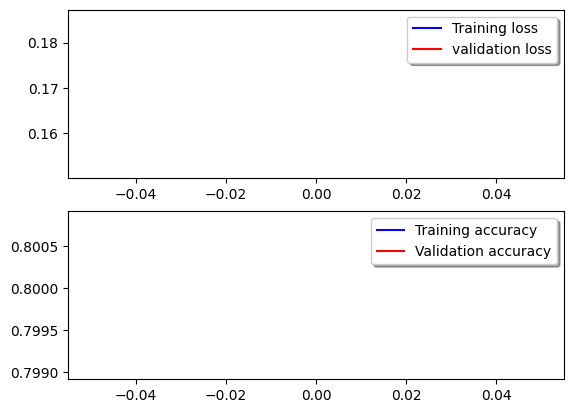

In [21]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

plt.show()

108/313 [=========>....................] - ETA: 0s

2023-01-07 20:56:53.874318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 1ms/step


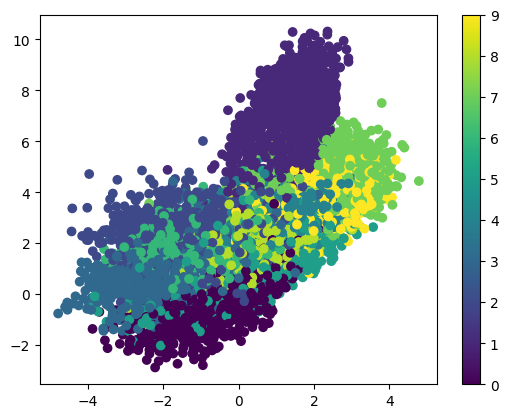

In [22]:
# Plot the latent space
latent_vectors = encoder.predict(X_test)
plt.scatter(latent_vectors[:, 0], latent_vectors[:, 1], c=y_test)
plt.colorbar()
plt.show()


In [ ]:
# Plot the reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(ae.predict(X_test)[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 3s 9ms/step


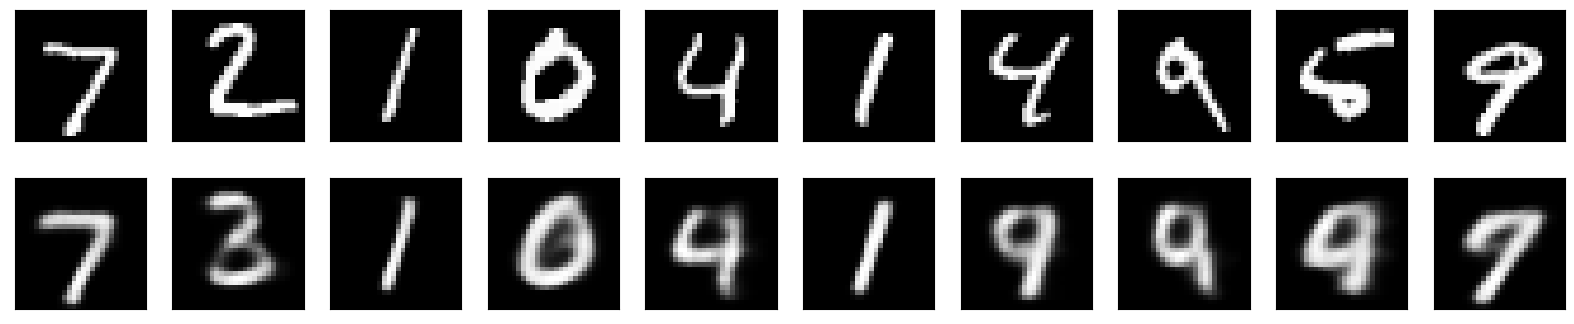

In [24]:
# Plot the reconstructed images
n = 10
fig, ax = plt.subplots(2, n, figsize=(20, 4))
for i in range(n):
    # Display original
    ax[0][i].imshow(X_test[i].reshape(28, 28))
    ax[0][i].get_xaxis().set_visible(False)
    ax[0][i].get_yaxis().set_visible(False)

    # Display reconstruction
    ax[1][i].imshow(ae.predict(X_test)[i].reshape(28, 28))
    ax[1][i].get_xaxis().set_visible(False)
    ax[1][i].get_yaxis().set_visible(False)